In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from pprint import pprint

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

In [3]:
np_CHI = np.load('./np_regression/np_CHI.npy')
np_IG = np.load('./np_regression/np_IG.npy')
np_MI = np.load('./np_regression/np_MI.npy')

In [4]:
# 把数据切分成训练集和测试集 输入没有标准化的数据
def split_data(data):
    X = data[:,0:-1]
    y = data[:,-1]
    return train_test_split(X,y,test_size=0.2)

# 输入不包含因变量的训练数据和测试数据
def standard_data(train_data,test_data):
    print('train_data_size:{}'.format(train_data.shape))
    print('test_data_size:{}'.format(test_data.shape))
    scaler = StandardScaler()
    
    scaler1 = scaler.fit(train_data[:,0:2])
    np1_train = scaler1.transform(train_data[:,0:2])
    np1_test = scaler1.transform(test_data[:,0:2])
    
    np2_train = train_data[:,2:17]
    np2_test = test_data[:,2:17]
    
    scaler2 = scaler.fit(train_data[:,17:67])
    np3_train = scaler2.transform(train_data[:,17:67])
    np3_test = scaler2.transform(test_data[:,17:67])

    np_train_data = np.hstack((np1_train,np2_train,np3_train))
    np_test_data = np.hstack((np1_test,np2_test,np3_test))
    print('train_data_scale_size:{}'.format(np_train_data.shape))
    print('test_data_scale_size:{}'.format(np_test_data.shape))
    return np_train_data,np_test_data


# 传入标准化的数据
def get_model_score(train_x,train_y,test_x,test_y,model):
    ans = {}
    rgs = model.fit(train_x,train_y)
    ans['MSE'] = mean_squared_error(test_y,rgs.predict(test_x))
    ans['MAE'] = mean_absolute_error(test_y,rgs.predict(test_x))
    ans['R2'] = r2_score(test_y,rgs.predict(test_x))
    return ans

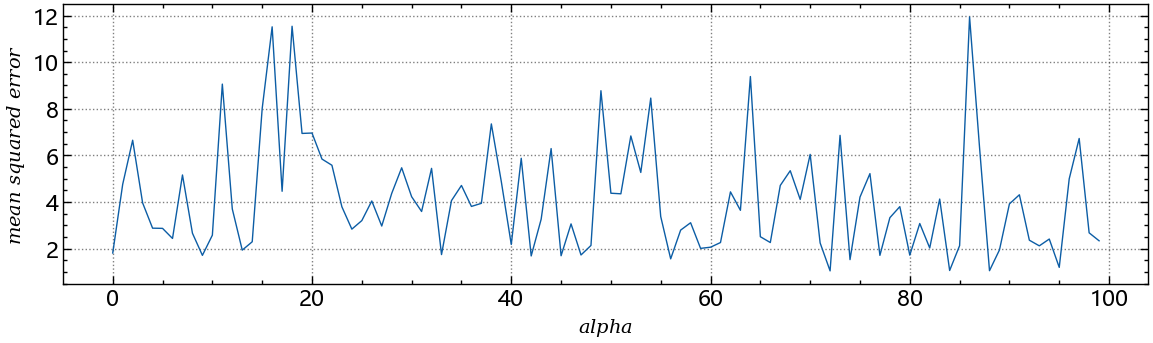

In [5]:
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(14,3.7),dpi=100)
    plt.plot(np_CHI[0:100,-1],linewidth=1)
    plt.xlabel(r'$alpha$',fontdict={'size':14})
    plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.show()

In [6]:
models = [
    [
        Ridge(alpha=10,max_iter=4000),
        Lasso(alpha=0.001,max_iter=5000),
        MLPRegressor(hidden_layer_sizes=(100,),
                      activation='relu',
                      solver='adam',
                      alpha=1,
                      batch_size=128,
                      random_state=None,
                      early_stopping=True,
                      validation_fraction=0.1,
                      max_iter=4000)
    ],
    [
        Ridge(alpha=10,max_iter=4000),
        Lasso(alpha=0.002,max_iter=5000),
        MLPRegressor(hidden_layer_sizes=(50,),
                      activation='relu',
                      solver='adam',
                      alpha=1,
                      batch_size=128,
                      random_state=None,
                      early_stopping=True,
                      validation_fraction=0.1,
                      max_iter=4000)
    ],
    [
        Ridge(alpha=3,max_iter=4000),
        Lasso(alpha=0.001,max_iter=5000),
        MLPRegressor(hidden_layer_sizes=(100,),
                      activation='relu',
                      solver='adam',
                      alpha=0.05,
                      batch_size=128,
                      random_state=None,
                      early_stopping=True,
                      validation_fraction=0.1,
                      max_iter=4000)
    ]
]
code_feature = {
    0:'CHI',
    1:'IG',
    2:'MI'
}
code_model = {
    0:'L2',
    1:'L1',
    2:'MLP'
}
score = {}
for idx,data in enumerate([np_CHI,np_IG,np_MI]):
    train_x,test_x,train_y,test_y = split_data(data)
    train_x,test_x = standard_data(train_x,test_x)
    score[code_feature[idx]] = {}
    for model_id,model in enumerate(models[idx]):
        score[code_feature[idx]][code_model[model_id]] = get_model_score(train_x,train_y,test_x,test_y,model)

train_data_size:(2903, 67)
test_data_size:(726, 67)
train_data_scale_size:(2903, 67)
test_data_scale_size:(726, 67)
train_data_size:(2903, 67)
test_data_size:(726, 67)
train_data_scale_size:(2903, 67)
test_data_scale_size:(726, 67)
train_data_size:(2596, 67)
test_data_size:(649, 67)
train_data_scale_size:(2596, 67)
test_data_scale_size:(649, 67)


In [7]:
pprint(score)

{'CHI': {'L1': {'MAE': 0.8709752583408681,
                'MSE': 1.4026104896462583,
                'R2': 0.4246765793335986},
         'L2': {'MAE': 0.8696304163047887,
                'MSE': 1.3901197743378122,
                'R2': 0.42980002672749174},
         'MLP': {'MAE': 0.8122568784218027,
                 'MSE': 1.250885734821277,
                 'R2': 0.4869111095827586}},
 'IG': {'L1': {'MAE': 0.8745756606344839,
               'MSE': 1.5176828080622238,
               'R2': 0.4222655228546355},
        'L2': {'MAE': 0.8731737340833291,
               'MSE': 1.5112545771347212,
               'R2': 0.4247125497393982},
        'MLP': {'MAE': 0.7945015787838823,
                'MSE': 1.2806187742370425,
                'R2': 0.5125084016066407}},
 'MI': {'L1': {'MAE': 0.9294337527043401,
               'MSE': 1.645198507490129,
               'R2': 0.3521316696436658},
        'L2': {'MAE': 0.9317169421557336,
               'MSE': 1.6464507497694123,
               'R2

In [37]:
np.save('./np_regression/score.npy',score)

In [49]:
# 使用最终的模型到数据上
train_x,test_x,train_y,test_y = split_data(np_CHI)
train_x,test_x = standard_data(train_x,test_x)
final_model = MLPRegressor(hidden_layer_sizes=(100,),
                          activation='relu',
                          solver='adam',
                          alpha=1,
                          batch_size=128,
                          random_state=None,
                          early_stopping=True,
                          validation_fraction=0.1,
                          max_iter=4000)
rgs = final_model.fit(train_x,train_y)
predict_y = rgs.predict(test_x)

train_data_size:(2903, 67)
test_data_size:(726, 67)
train_data_scale_size:(2903, 67)
test_data_scale_size:(726, 67)


In [44]:
np_CHI[:,-1]

array([1.80833333, 4.75833333, 6.65      , ..., 1.90833333, 1.925     ,
       2.26666667])

In [50]:
predict_y

array([2.12299373, 2.23442602, 2.12595408, 5.27029266, 3.93138972,
       1.90290428, 1.56057429, 2.4963066 , 1.8849554 , 1.77381129,
       5.01710514, 2.82321392, 2.00525615, 4.24783913, 3.84553339,
       4.25565726, 2.13290861, 2.61458696, 3.63142997, 4.31265155,
       2.93921623, 6.82648671, 4.56350318, 5.22562888, 4.38116164,
       1.95264758, 5.39435167, 2.65088987, 4.80497398, 6.56447255,
       3.0794655 , 2.29524486, 3.66077745, 1.96917663, 6.23852095,
       1.84649806, 4.70927944, 2.93179482, 1.85318915, 3.6911483 ,
       4.30437129, 3.44408923, 5.68971606, 6.05872201, 3.02089265,
       1.98922329, 3.50405376, 2.27077726, 2.35048044, 6.58912224,
       2.63486436, 4.20009539, 2.96976438, 1.97447441, 3.74136926,
       3.0291081 , 3.8685192 , 4.10627489, 2.94640119, 3.16078221,
       3.23057972, 2.42031762, 3.3450296 , 2.95089285, 3.20948966,
       2.68458353, 1.72417545, 3.48761003, 3.03369635, 5.96937552,
       1.84072254, 3.92819055, 1.39353088, 3.98992015, 3.04675

In [46]:
predict_y = rgs.predict(np_CHI[:,0:-1])

In [48]:
np.absolute(np_CHI[:,-1]-predict_y).mean()

18.81017705686783

In [51]:
np.absolute(test_y-predict_y).mean()

0.8253523746592789

In [52]:
diff = []
for ty,py in zip(test_y,predict_y):
    if ty > 4:
        continue
    else:
        diff.append(ty-py)

In [53]:
len(diff)

551

In [54]:
np.absolute(np.array(diff)).mean()

0.7115503776582429

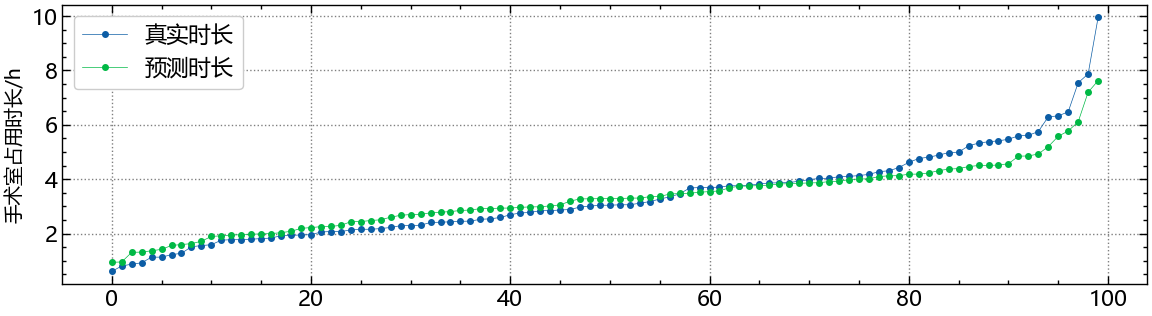

In [35]:
with plt.style.context(['science','grid','notebook']):
    ty = test_y[0:100]
    py = predict_y[0:100]
    ty.sort()
    py.sort()
    fig= plt.figure(figsize=(14,3.7),dpi=100)
    plt.plot(ty,linewidth=0.5,marker='o',label='真实时长',markersize=4)
    plt.plot(py,linewidth=0.5,marker='o',label='预测时长',markersize=4)
#     plt.xlabel(r'$alpha$',fontdict={'size':14})
    plt.ylabel('手术室占用时长/h',fontdict={'size':14})
    plt.legend()
    plt.show()

In [36]:
len(rgs.loss_curve_)

49